In [1]:
import pickle
import matplotlib.pyplot as plt

In [30]:
import statistics
from math import sqrt

def load_stats(name):
    with open(f"{name}.pickle", 'rb') as handle:
        stats = pickle.load(handle)
    return stats

def plot_confidence_interval(x, values, z=1.96, color='#2187bb', horizontal_line_width=0.25, label=None):
    mean = statistics.mean(values)
    stdev = statistics.stdev(values)
    confidence_interval = z * stdev / sqrt(len(values))

    left = x - horizontal_line_width / 2
    top = mean - confidence_interval
    right = x + horizontal_line_width / 2
    bottom = mean + confidence_interval
    plt.plot([x, x], [top, bottom], color=color, label=label)
    plt.plot([left, right], [top, top], color=color)
    plt.plot([left, right], [bottom, bottom], color=color)
    plt.plot(x, mean, 'o', color='#f44336')

    return mean, confidence_interval

In [31]:
anfis_stats = load_stats("all_anfis_stats")
# add_anfis_stats  = load_stats("add_anfis_stats")

monolit_stats = load_stats("monolit_model")
anfislike_model_stats = load_stats("3_model_anfislike")

print(anfis_stats)
print(monolit_stats)
print(anfislike_model_stats)

{'n_traj': [10, 25, 50, 100, 200, 500, 750, 1000, 10, 10, 25, 25, 50, 50, 100, 100, 100, 200, 200, 500, 500, 750, 750, 1000, 1000], 'losses': [0.02413099817931652, 0.019077040255069733, 0.011517120525240898, 0.014652514830231667, 0.010443967767059803, 0.010330118238925934, 0.010412239469587803, 0.01038480456918478, 0.03712207451462746, 0.01971006765961647, 0.014389704912900925, 0.02496352419257164, 0.011660823598504066, 0.017681898549199104, 0.008708293549716473, 0.008708293549716473, 0.01116246823221445, 0.012612917460501194, 0.009829279966652393, 0.010330118238925934, 0.010158308781683445, 0.01118229329586029, 0.01096278429031372, 0.00990494154393673, 0.010224160738289356]}
{'n_traj': [10, 25, 50, 100, 200, 500, 750, 1000], 'losses': [0.018209246918559074, 0.01302536390721798, 0.008066050708293915, 0.006390382070094347, 0.005752246826887131, 0.005148552358150482, 0.005074845626950264, 0.004609912633895874]}
{'n_traj': [10, 25, 50, 100, 200, 500, 750, 1000], 'losses': [0.0066809081472

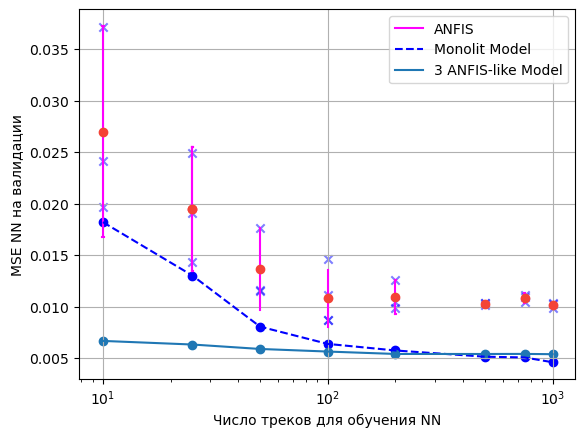

In [33]:
import numpy as np

plt.figure()

# plt.scatter(anfis_stats["n_traj"], anfis_stats["losses"], c="b")

all_losses = anfis_stats["losses"]
all_traj = anfis_stats["n_traj"]
losses_array = np.vstack((all_traj ,all_losses))

for n_tr in set(all_traj):
    values = losses_array[1, :][losses_array[0, :] == n_tr]
    plot_confidence_interval(n_tr, values, color="magenta")

plot_confidence_interval(n_tr, values, color="magenta", label="ANFIS")
    
plt.scatter(all_traj, all_losses, marker="x", c="b",alpha=0.5)

# plt.scatter(add_anfis_stats["n_traj"], add_anfis_stats["losses"], c="b")
# plt.plot(anfis_stats["n_traj"], anfis_stats["losses"], "b",  label="ANFIS")

plt.scatter(monolit_stats["n_traj"], monolit_stats["losses"], c="b")
plt.plot(monolit_stats["n_traj"], monolit_stats["losses"], "b--", label="Monolit Model")

plt.scatter(anfislike_model_stats["n_traj"], anfislike_model_stats["losses"])
plt.plot(anfislike_model_stats["n_traj"], anfislike_model_stats["losses"], label="3 ANFIS-like Model")

plt.grid()
plt.xlabel("Число треков для обучения NN")
plt.ylabel("MSE NN на валидации")
plt.legend()

plt.xscale("log")
# plt.yscale("log")